# Plot Cross-Sections

In [1]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import glob,imp,os,shutil
from pandas.io.json import json_normalize
import pyslha
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import interp1d
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

### Create process dict

In [10]:
processDict = {'sms' : r'$p p \to \tilde{t} \tilde{t}$',
              'dmeft' : r'$p p \to \tilde{\chi} \tilde{\chi}$',
              'smeft_full' : r'$p p \to t \bar{t}$ (NLO)',
              'smeft_bsm' : r'$p p \to t \bar{t}$ (NLO-BSM)',
              'smeft_sm' : r'$p p \to t \bar{t}$ (NLO-SM)'}

axes = {'sms' : ('mass.5000002','xsec13TeV(fb).-5000002_5000002'),
        'dmeft' : ('mass.5000002','xsec13TeV(fb).5000012_5000012'),
#         'dmeft' : ('mass.5000012','xsec13TeV(fb).5000012_5000012'),
        'smeft_full' : ('mass.5000002','xsec13TeV(fb).-6_6'),
        'smeft_bsm' : ('mass.5000002','xsec13TeV(fb).-6_6'),
        'smeft_sm' : ('mass.5000002','xsec13TeV(fb).-6_6'),
       }

axesLabels = {'mass.5000002' : r'$m_{\tilde{t}}$ (GeV)', 
              'mass.5000012' :r'$m_{\tilde{\chi}}$ (GeV)',
             'xsec13TeV(fb).-5000002_5000002' : r'$\sigma$ (fb)',
             'xsec13TeV(fb).5000012_5000012' : r'$\sigma$ (fb)',
              'xsec13TeV(fb).-6_6' : r'$\sigma$ (fb)'
             }

## Load data

In [3]:
data = {}
for proc in processDict:
    f = '../slhaFiles/%s_slha.pcl' %(proc)
    if os.path.isfile(f):
        data[proc] = pd.read_pickle(f)

### Plot Cross-Sections

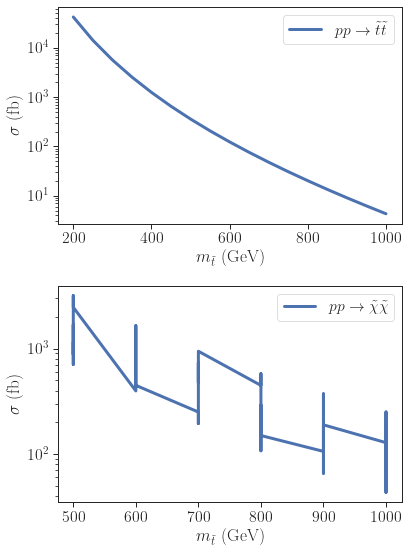

In [16]:
fig,ax = plt.subplots(nrows=2,ncols=max(1,int(len(data)/2)),figsize=(6,8))
for iproc,proc in enumerate(data.keys()):
    x,y = axes[proc]
    dataDF = data[proc]
    xpts = dataDF[x]
    ypts = dataDF[y]
    ypts = ypts[np.argsort(xpts)]
    xpts = xpts[np.argsort(xpts)]
    ax[iproc].plot(xpts,ypts,label=processDict[proc],linewidth=3)
    ax[iproc].set_xlabel(axesLabels[x])
    ax[iproc].set_ylabel(axesLabels[y])
    ax[iproc].set_yscale('log')
    ax[iproc].legend()
#     ax[iproc].set_title()
plt.legend()
plt.tight_layout()
plt.show()